In [2]:
import os
from sklearn.model_selection import train_test_split
import pandas as pd

# Define the base directory where 'cleaned_data.csv' and image files are located
base_dir = 'C:\\Users\\Checkout\\Desktop\\noise3'
dataset_dir = os.path.join(base_dir, 'datasets')

# Load the cleaned data
df = pd.read_csv(os.path.join(base_dir, 'cleaned_data.csv'))
# Assuming 'df' is your main dataframe
# Split the data into train+val and test sets first
train_val, test = train_test_split(df, test_size=0.1, random_state=42)  # Adjust sizes as needed

# Split train_val into train and val sets
train, val = train_test_split(train_val, test_size=0.11, random_state=42)  # Adjust sizes as needed

# Now you have train, val, and test dataframes
copy_files(train, 'train')
copy_files(val, 'val')
copy_files(test, 'test')


base_dir = 'C:/Users/Checkout/Desktop/noise3'  # Update this path
dataset_dir = os.path.join(base_dir, 'datasets')
os.makedirs(dataset_dir, exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'images/train'), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'images/val'), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'images/test'), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'labels/train'), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'labels/val'), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'labels/test'), exist_ok=True)

def copy_files(df, split_type):
    image_dir = os.path.join(dataset_dir, 'images', split_type)
    label_dir = os.path.join(dataset_dir, 'labels', split_type)

    for _, row in df.iterrows():
        # Class folder creation based on quantity
        class_folder = f"class_{int(row['quantity'])}"  # Creates a folder like class_1, class_2 etc.
        class_image_dir = os.path.join(image_dir, class_folder)
        class_label_dir = os.path.join(label_dir, class_folder)

        # Create directories if they don't exist
        os.makedirs(class_image_dir, exist_ok=True)
        os.makedirs(class_label_dir, exist_ok=True)

        # File paths
        source_path = os.path.join(base_dir, row['filename'])
        dest_image_path = os.path.join(class_image_dir, os.path.basename(row['filename']))
        dest_label_path = os.path.join(class_label_dir, os.path.basename(row['filename']).replace('.jpg', '.txt'))

        # Copy image
        shutil.copy(source_path, dest_image_path)
        # Write label
        with open(dest_label_path, 'w') as file:
            file.write(f"{int(row['quantity'])}\n")  # Still writing quantity as label info

# Execute the function for each dataset split
copy_files(train, 'train')
copy_files(val, 'val')
copy_files(test, 'test')

NameError: name 'copy_files' is not defined

In [3]:
import os
import pandas as pd
import shutil
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the base directory where 'cleaned_data.csv' and image files are located
base_dir = 'C:\\Users\\Checkout\\Desktop\\noise3'
dataset_dir = os.path.join(base_dir, 'datasets')

# Create necessary directories for storing images and labels
os.makedirs(os.path.join(dataset_dir, 'images/train'), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'images/val'), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'images/test'), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'labels/train'), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'labels/val'), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'labels/test'), exist_ok=True)

# Load the cleaned data
df = pd.read_csv(os.path.join(base_dir, 'cleaned_data.csv'))

# Split data into train+val and test datasets
train_val, test = train_test_split(df, test_size=0.1, random_state=42)
train, val = train_test_split(train_val, test_size=0.11, random_state=42)  # 0.11 x 0.9 ≈ 0.1 of the original data

def copy_files(df, split_type):
    """Copy files into the right directories and create label files."""
    image_dir = os.path.join(dataset_dir, 'images', split_type)
    label_dir = os.path.join(dataset_dir, 'labels', split_type)

    for _, row in df.iterrows():
        # Source path where original images are stored
        source_path = os.path.join(base_dir, row['filename'])
        # Destination path for images
        dest_path = os.path.join(image_dir, row['filename'])
        # Ensure destination directory exists
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)
        # Copy image from source to destination
        shutil.copy(source_path, dest_path)

        # Create and write to the label file
        label_path = os.path.join(label_dir, row['filename'].replace('.jpg', '.txt'))
        with open(label_path, 'w') as file:
            file.write(f"{int(row['quantity'])}\n")

# Function to organize images by class folder
def organize_files(df, split_type):
    image_dir = os.path.join(dataset_dir, 'images', split_type)
    os.makedirs(image_dir, exist_ok=True)
    for _, row in df.iterrows():
        class_folder = f"class_{int(row['quantity'])}"
        class_image_dir = os.path.join(image_dir, class_folder)
        os.makedirs(class_image_dir, exist_ok=True)
        source_path = os.path.join(base_dir, row['filename'])
        dest_image_path = os.path.join(class_image_dir, os.path.basename(row['filename']))
        shutil.copy(source_path, dest_image_path)
        
# Execute the function for each dataset split
copy_files(train, 'train')
copy_files(val, 'val')
copy_files(test, 'test')

In [4]:
# Data preparation for CNN with ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load images in batches from directories and apply data augmentation
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'images/train'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
# Function to organize images by class folder
def organize_files(df, split_type):
    image_dir = os.path.join(dataset_dir, 'images', split_type)
    os.makedirs(image_dir, exist_ok=True)
    for _, row in df.iterrows():
        class_folder = f"class_{int(row['quantity'])}"
        class_image_dir = os.path.join(image_dir, class_folder)
        os.makedirs(class_image_dir, exist_ok=True)
        source_path = os.path.join(base_dir, row['filename'])
        dest_image_path = os.path.join(class_image_dir, os.path.basename(row['filename']))
        shutil.copy(source_path, dest_image_path)
val_generator = val_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'images/val'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 8010 images belonging to 6 classes.
Found 990 images belonging to 6 classes.


In [5]:
# CNN Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')  # 6 classes based on the labels
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Model training
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # Depends on the size of your training set
    epochs=20,
    validation_data=val_generator,
    validation_steps=50  # Depends on the size of your validation set
)

# Save the model
model.save('cnn_model.h5')

print("Model trained and saved successfully.")


Epoch 1/20
100/100 [==============================] - 78s 759ms/step - loss: 1.7877 - accuracy: 0.2030 - val_loss: 1.6211 - val_accuracy: 0.2434
Epoch 2/20
100/100 [==============================] - 62s 623ms/step - loss: 1.6173 - accuracy: 0.2467
Epoch 3/20
100/100 [==============================] - 62s 616ms/step - loss: 1.5540 - accuracy: 0.2869
Epoch 4/20
100/100 [==============================] - 63s 628ms/step - loss: 1.5444 - accuracy: 0.2948
Epoch 5/20
100/100 [==============================] - 65s 644ms/step - loss: 1.5193 - accuracy: 0.3050
Epoch 6/20
100/100 [==============================] - 62s 621ms/step - loss: 1.5078 - accuracy: 0.2969
Epoch 7/20
100/100 [==============================] - 62s 616ms/step - loss: 1.4611 - accuracy: 0.3372
Epoch 8/20
100/100 [==============================] - 63s 622ms/step - loss: 1.4640 - accuracy: 0.3450
Epoch 9/20
100/100 [==============================] - 62s 614ms/step - loss: 1.4248 - accuracy: 0.3719
Epoch 10/20
100/100 [==========

In [6]:
from tensorflow.keras.callbacks import Callback

class PrintValMetrics(Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Ensure the logs contain 'val_loss' and 'val_accuracy' before printing
        val_loss = logs.get('val_loss', 'N/A')
        val_acc = logs.get('val_accuracy', 'N/A')
        print(f"Epoch {epoch + 1}: val_loss = {val_loss}, val_accuracy = {val_acc}")

# CNN Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')  # 6 classes based on the labels
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Calculate validation steps dynamically
validation_steps = val_generator.samples // val_generator.batch_size

# Train the model using adjusted validation steps
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # Adjust based on your training data size
    epochs=20,
    validation_data=val_generator,
    validation_steps=validation_steps,
    callbacks=[PrintValMetrics()]  # Print validation metrics for each epoch
)

# Save the model
model.save('cnn_model.h5')

print("Model trained and saved successfully.")


Epoch 1/20
100/100 [==============================] - 78s 762ms/step - loss: 1.7668 - accuracy: 0.2031 - val_loss: 1.6416 - val_accuracy: 0.2552
Epoch 2/20
100/100 [==============================] - 73s 731ms/step - loss: 1.6261 - accuracy: 0.2494 - val_loss: 1.5944 - val_accuracy: 0.2698
Epoch 3/20
100/100 [==============================] - 74s 741ms/step - loss: 1.5619 - accuracy: 0.2775 - val_loss: 1.5399 - val_accuracy: 0.3021
Epoch 4/20
100/100 [==============================] - 75s 746ms/step - loss: 1.5185 - accuracy: 0.3141 - val_loss: 1.6218 - val_accuracy: 0.2365
Epoch 5/20
100/100 [==============================] - 75s 750ms/step - loss: 1.5145 - accuracy: 0.3137 - val_loss: 1.5219 - val_accuracy: 0.2990
Epoch 6/20
100/100 [==============================] - 74s 743ms/step - loss: 1.4416 - accuracy: 0.3568 - val_loss: 1.4853 - val_accuracy: 0.3240
Epoch 7/20
100/100 [==============================] - 73s 733ms/step - loss: 1.4141 - accuracy: 0.3729 - val_loss: 1.5744 - val_ac

In [7]:
from tensorflow.keras.models import load_model

# Load the model from the file
model = load_model('cnn_model.h5')

# Use the model for prediction, evaluation, etc.


In [8]:
import os
print("Current working directory:", os.getcwd())
print("Files in current directory:", os.listdir('.'))


Current working directory: C:\Users\Checkout\Documents
Files in current directory: ['.ipynb_checkpoints', '017402736_Homework4_Source_Code.ipynb', '35% accuracy gwar.ipynb', 'Adobe', 'cache', 'Camtasia', 'CL-test1.ipynb', 'cnn_model.h5', 'cnn_model_balanced.h5', 'cnn_model_improved.h5', 'Custom Office Templates', 'DataExploration.ipynb', 'desktop.ini', 'Downloads', 'exports', 'housing.csv', 'HW1_017428437.py', 'IBM', 'ML_HW1_TanviPagrut_017402736_SourceCode.ipynb', 'My Music', 'My Pictures', 'My Videos', 'NBA.csv', 'pandasai.log', 'Python Scripts', 'Snagit', 'tanvi cnn.ipynb', 'titanic.csv', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb', 'Untitled4.ipynb', 'Untitled5.ipynb', 'Untitled6.ipynb', 'Untitled8.ipynb', 'Youtube_video_file.txt', 'Zoom']


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you have already imported other required modules like os, numpy, etc.

# Setup the ImageDataGenerator for validation set (reuse for test set)
val_datagen = ImageDataGenerator(rescale=1./255)

# Setup the test generator
test_generator = val_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'images/test'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for consistent order to match predictions with actuals
)

# Load your model if not already in memory
from tensorflow.keras.models import load_model
model = load_model('cnn_model.h5')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


Found 1000 images belonging to 6 classes.
32/32 [==============================] - 9s 218ms/step - loss: 2.9657 - accuracy: 0.2860
Test Loss: 2.965651750564575
Test Accuracy: 0.28600001335144043


In [10]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions for all images in the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  # Extracting the labels from the generator

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(class_report)


32/32 [==============================] - 7s 225ms/step
Confusion Matrix:
[[28 11  1  0  0  0]
 [ 6 75 36 35 13  3]
 [ 1 40 29 64 43 31]
 [ 0 21 19 53 49 37]
 [ 0 12 30 60 40 58]
 [ 0 11 30 61 42 61]]
Classification Report:
              precision    recall  f1-score   support

     class_0       0.80      0.70      0.75        40
     class_1       0.44      0.45      0.44       168
     class_2       0.20      0.14      0.16       208
     class_3       0.19      0.30      0.23       179
     class_4       0.21      0.20      0.21       200
     class_5       0.32      0.30      0.31       205

    accuracy                           0.29      1000
   macro avg       0.36      0.35      0.35      1000
weighted avg       0.29      0.29      0.29      1000



In [11]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Assume predictions and test_generator have been defined and predictions have been made as per your provided code
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  # Extracting the labels from the generator

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(class_report)

# Calculate and display accuracy for each class
class_accuracy = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
for i, accuracy in enumerate(class_accuracy):
    print(f"Accuracy for {class_labels[i]}: {accuracy:.2f}")


32/32 [==============================] - 7s 226ms/step
Confusion Matrix:
[[28 11  1  0  0  0]
 [ 6 75 36 35 13  3]
 [ 1 40 29 64 43 31]
 [ 0 21 19 53 49 37]
 [ 0 12 30 60 40 58]
 [ 0 11 30 61 42 61]]
Classification Report:
              precision    recall  f1-score   support

     class_0       0.80      0.70      0.75        40
     class_1       0.44      0.45      0.44       168
     class_2       0.20      0.14      0.16       208
     class_3       0.19      0.30      0.23       179
     class_4       0.21      0.20      0.21       200
     class_5       0.32      0.30      0.31       205

    accuracy                           0.29      1000
   macro avg       0.36      0.35      0.35      1000
weighted avg       0.29      0.29      0.29      1000

Accuracy for class_0: 0.70
Accuracy for class_1: 0.45
Accuracy for class_2: 0.14
Accuracy for class_3: 0.30
Accuracy for class_4: 0.20
Accuracy for class_5: 0.30


In [12]:
# Print final training and validation accuracy
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {final_train_acc}")
print(f"Final Validation Accuracy: {final_val_acc}")

# Setup the test generator
test_generator = val_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'images/test'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for consistent order to match predictions with actuals
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

Final Training Accuracy: 0.8912500143051147
Final Validation Accuracy: 0.32083332538604736
Found 1000 images belonging to 6 classes.
32/32 [==============================] - 7s 222ms/step - loss: 2.9657 - accuracy: 0.2860
Test Loss: 2.965651750564575
Test Accuracy: 0.28600001335144043


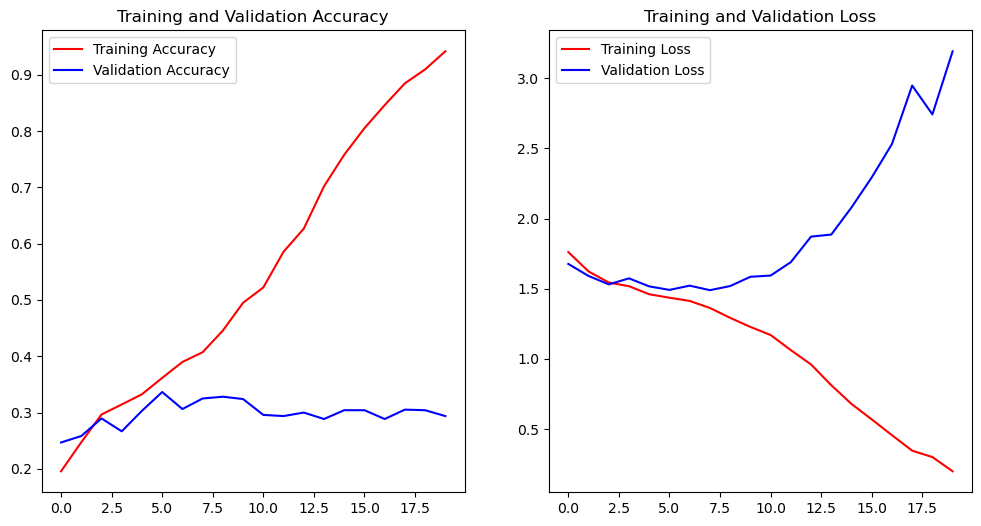

In [12]:
import matplotlib.pyplot as plt

# Extracting accuracy and loss from the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))  # Number of epochs

# Accuracy plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


32/32 [==============================] - 7s 210ms/step


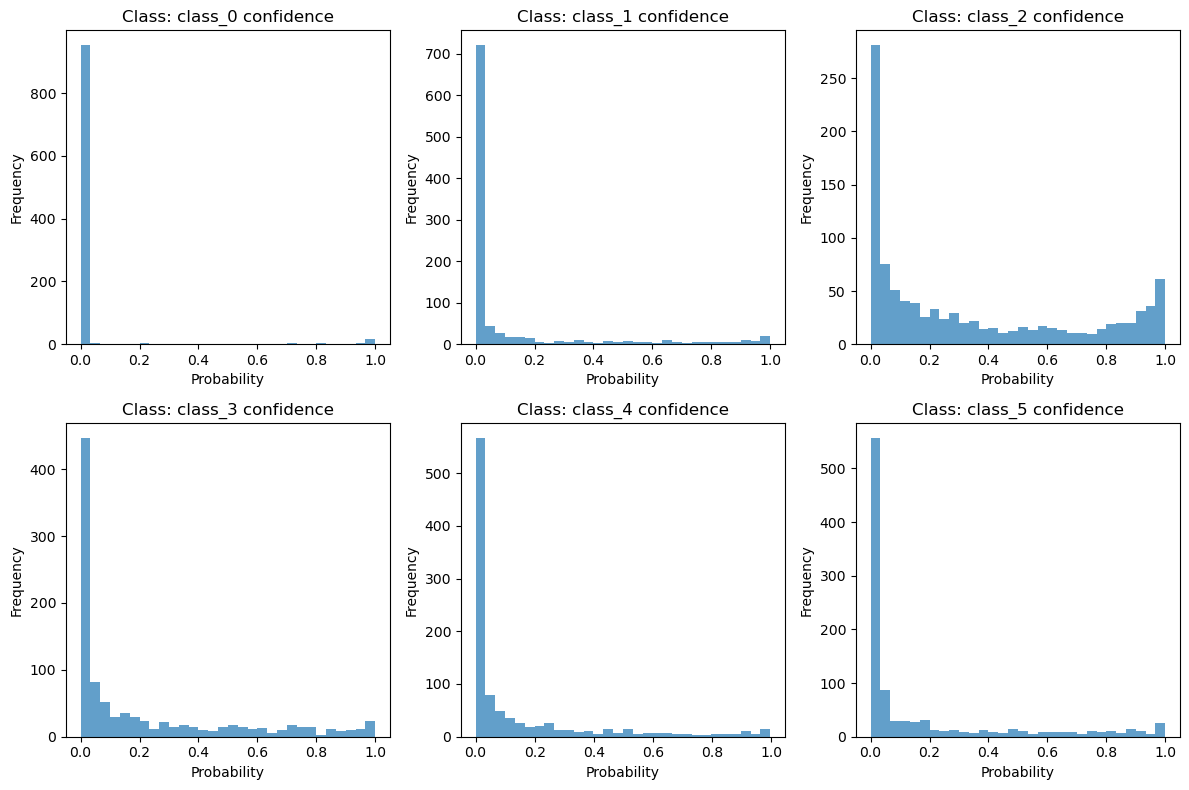

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming test_generator and model are already defined and loaded

# Get predictions
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  # Get the mapping of classes

# Plotting confidence for each class
plt.figure(figsize=(12, 8))

for i, class_label in enumerate(class_labels):
    plt.subplot(2, 3, i+1)  # Adjust the subplot layout depending on the number of classes
    plt.hist(predictions[:, i], bins=30, alpha=0.7)
    plt.title(f'Class: {class_label} confidence')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


32/32 [==============================] - 7s 219ms/step


C:\Users\Checkout\AppData\Local\Temp\ipykernel_8040\1882634223.py:17: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
C:\Users\Checkout\AppData\Local\Temp\ipykernel_8040\1882634223.py:17: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)
C:\Users\Checkout\AppData\Local\Temp\ipykernel_8040\1882634223.py:17: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


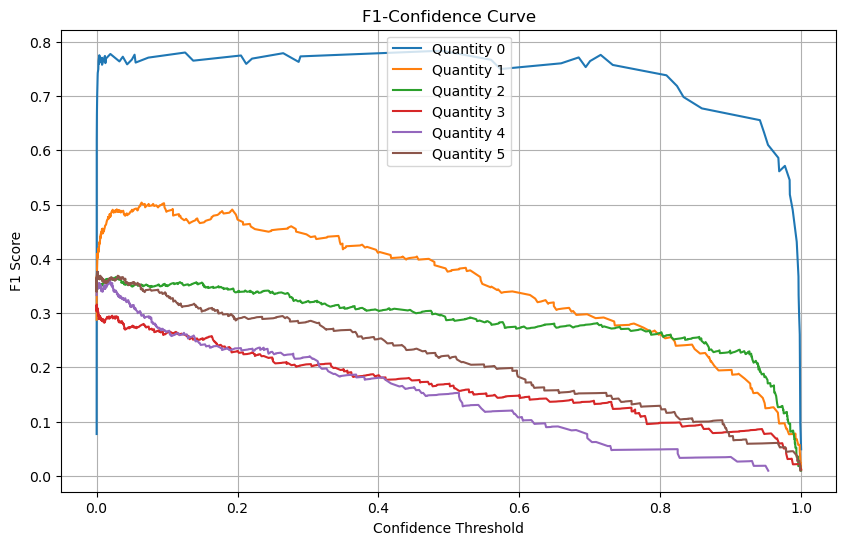

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_recall_curve

# Generate predictions as probabilities
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# True classes
true_classes = test_generator.classes

# Initialize plot
plt.figure(figsize=(10, 6))

# Calculate and plot F1-score for each class
for i in range(predictions.shape[1]):  # Loop through each class
    precision, recall, thresholds = precision_recall_curve(true_classes == i, predictions[:, i])
    f1_scores = 2 * (precision * recall) / (precision + recall)
    plt.plot(thresholds, f1_scores[:-1], label=f'Quantity {i}')  # Exclude last point because it is NaN

plt.title('F1-Confidence Curve')
plt.xlabel('Confidence Threshold')
plt.ylabel('F1 Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Found 1000 images belonging to 6 classes.
32/32 [==============================] - 7s 212ms/step


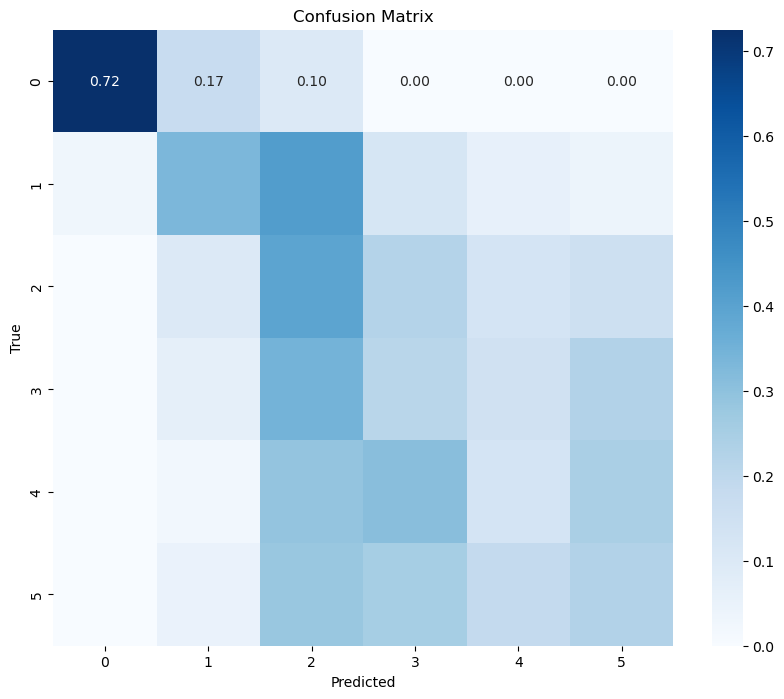

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you have test_generator set up similarly to the previous examples
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    os.path.join(dataset_dir, 'images/test'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Load the model
model = load_model('cnn_model.h5')

# Get the predictions from the model
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
true_classes = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()


Found 1000 images belonging to 6 classes.
32/32 [==============================] - 8s 235ms/step


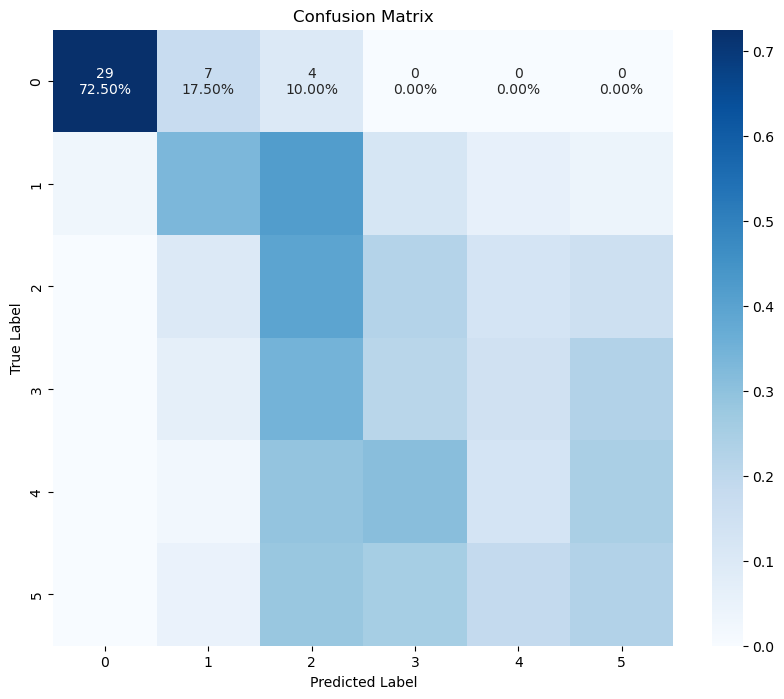

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you have test_generator set up similarly to the previous examples
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    os.path.join(dataset_dir, 'images/test'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Load the model
model = load_model('cnn_model.h5')

# Get the predictions from the model
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
true_classes = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Prepare annotations by combining the absolute `cm` values and the `cm_normalized` percentages
labels = (np.asarray(["{0:.0f}\n{1:.2f}%".format(value, percentage*100)
                      for value, percentage in zip(cm.flatten(), cm_normalized.flatten())])
          ).reshape(cm.shape)

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=labels, fmt="", cmap='Blues', cbar=True)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
